In [100]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [101]:
import os, shutil, re
from collections import Counter
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt
from sklearn import manifold
from nltk.corpus.reader import PlaintextCorpusReader
from adjustText import adjust_text 
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

In [102]:
_source = '/Users/jgrosman/Projects/jeremias/raw/'
_target = '/Users/jgrosman/Projects/jeremias/clean/'

In [103]:
filenames = os.listdir(_source)[1:]

In [104]:
#clean data
for i, fname in enumerate(filenames):
    fpath = os.path.join(_source, fname)
    tpath = os.path.join(_target, fname)
    
    with open(fpath, 'r') as f_:
        raw = f_.read().lower()
        raw = re.sub("\d+", "", raw)
    
    with open(tpath, 'w') as f_:
        f_.write(raw)

In [105]:
#file attributes
filenames = os.listdir(_target)[1:]
filepaths = [os.path.join(_target, fname) for fname in filenames]

In [106]:
deliberative = [
    'partn[a-z]*',
    'collaborat[a-z]*',
    'subj[a-z]*',
    'revol[a-z]*',
    'co-design',
    'engag[a-z]*',
    'empow[a-z]*',
    'interpret[a-z]*',
    'learn[a-z]*',
    'explor[a-z]*',
    'tacit knowl[a-z]*',
    'socially robust',
    'reflect[a-z]*',
    'disput[a-z]*',
    'civil soc[a-z]*',
    'lifeworld',
    'joint understanding',
    'mutual[a-z]*',
    'dillemm[a-z]*',
    'coordinat[a-z]*',
    'align[a-z]*',
    'arrang[a-z]*',
]

technocratic = [
    'stakeholder',
    'decision maker',
    'implement',
    'input',
    'output',
    'effecti[a-z]*',
    'scrutiniz[a-z]*',
    'verif[a-z]*',
    'test[a-z]*',
    'expert[a-z]*',
    'policy',
    'state',
    'reform',
    'govern[a-z]*',
    'solution',
    'solv[a-z]*',
    'supervis[a-z]*',
    'regulat[a-z]*',
]

vocabulary = technocratic+deliberative

In [107]:
technocratic_data = np.ndarray((len(filenames), len(technocratic)))
deliberative_data = np.ndarray((len(filenames), len(deliberative)))
term_counts = np.ndarray((len(filenames), len(vocabulary)))
document_size = np.ndarray((len(filenames),))

In [108]:
for i, fname in enumerate(filepaths):
    
    fpath = os.path.join(_target, fname)
    with open(fpath, 'r') as f:
        raw = f.read().lower().decode('utf-8')
    
    for j, term in enumerate(technocratic):
        technocratic_data[i, j] = len(re.findall(term, raw, flags=re.U))
    for j, term in enumerate(deliberative):
        deliberative_data[i, j] = len(re.findall(term, raw, flags=re.U))
    for j, term in enumerate(vocabulary):
        term_counts[i, j] = len(re.findall(term, raw, flags=re.U))
        
    document_size[i] = len(raw.split())

    print '\r', fname, i,

"""
print 'Articles without technocratic data: '
for i in np.where(technocratic_data.sum(axis=1) == 0)[0]:
    print  filepaths[i]
        
print 'Articles without deliberative data: '
for i in np.where(deliberative_data.sum(axis=1) == 0)[0]:
    print  filepaths[i]
"""

/Users/jgrosman/Projects/jeremias/clean/Zurayk-2011-Ensuring that potential Gulf farml.txt 1314

"\nprint 'Articles without technocratic data: '\nfor i in np.where(technocratic_data.sum(axis=1) == 0)[0]:\n    print  filepaths[i]\n        \nprint 'Articles without deliberative data: '\nfor i in np.where(deliberative_data.sum(axis=1) == 0)[0]:\n    print  filepaths[i]\n"

In [109]:
deliberative_data_masked = np.ma.MaskedArray(deliberative_data, not np.isnan)
technocratic_data_masked = np.ma.MaskedArray(technocratic_data, not np.isnan)

D_freq = np.array(deliberative_data_masked.sum(axis=1) / (document_size * len(vocabulary)))
T_freq = np.array(technocratic_data_masked.sum(axis=1) / (document_size * len(vocabulary)))


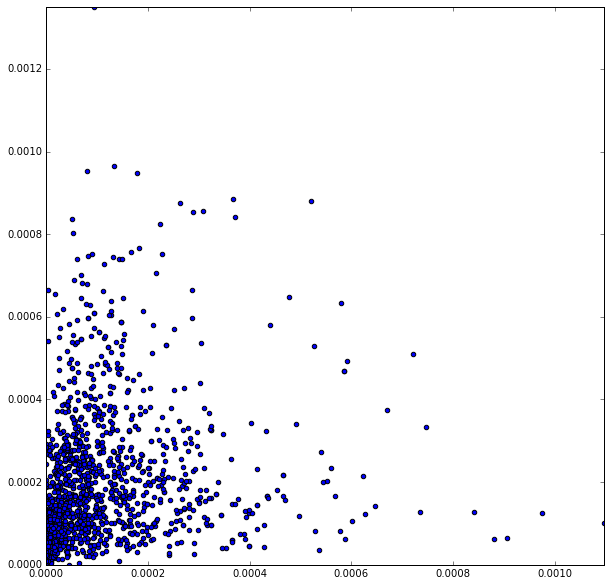

In [110]:
plt.figure(figsize=(10, 10))
plt.axis([D_freq.min(),D_freq.max(),T_freq.min(),T_freq.max()])
plt.scatter(D_freq, _T_freq)
plt.show()